## imports

In [59]:
#First we want to try to laoad the data in and put it in a dataframe. 
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import os

import ast
import matplotlib.pyplot as plt

from copy import deepcopy
import numpy as np

In [2]:
#returns dataframe 
def load_my_data(filename):
    return pd.read_csv(filename,delimiter=";")

## read in data

In [3]:
#Next we want to locate ourselves in this folder and get the data into dataframes 

data_folder = "../collected_data/"
list_of_files = os.listdir(data_folder)
# print(list_of_files)

shapes_df = []
dir_df    = []


#Bring in the data throug the dataframes done. 
for file in list_of_files:
    if("shap" in file):
        dat = load_my_data(os.path.join(data_folder,file))
        shapes_df.append(dat)
    elif("dir" in file):
        dat = load_my_data(os.path.join(data_folder,file))
        dir_df.append(dat)
# shapes_df[0].columns
# shapes_df[0]


In [4]:
shapes_dfs_list = deepcopy(shapes_df)
dir_dfs_list = deepcopy(dir_df)

In [5]:
print(len(shapes_dfs_list))
print(len(dir_dfs_list))

9
8


## process

In [6]:
print("\n".join(shapes_dfs_list[0].columns.values))

username
technique_name
total_time
left_button_presses
right_button_presses
time_per_object
left_hand_distances
right_hand_distances


In [7]:
shapes_dfs_list[0]["right_hand_distances"].to_list()[0]

'[2.282796,1.709386,1.43544,1.572064,1.680351,1.490742,1.435556,1.424203,1.432039,3.015035,2.140167,2.217907,2.411656,1.297843,2.030379,2.560373,2.247064,2.222648,2.142141,2.995356,1.384497,1.3123,1.233099,1.259168,0.03144629,1.787374,2.148644,2.180737,1.25344]'

In [8]:
def obj_to_list(obj):
    if(type(obj) == list):
        return obj
    else:
        return ast.literal_eval(obj)

In [9]:
def extract_data(list_dfs: list) -> dict:
    total_times, left_button_presses, right_button_presses, time_per_object = [], [], [], []
    left_hand_distances, right_hand_distances = [], []

    for df in list_dfs:
        # print(df["total_time"])
        total_times.append(df["total_time"].values[0])

        temp = obj_to_list(df["left_button_presses"].to_list()[0])
        left_button_presses.append(temp)

        temp = obj_to_list(df["right_button_presses"].to_list()[0])
        right_button_presses.append(temp)

        temp = obj_to_list(df["time_per_object"].to_list()[0])
        time_per_object.append(temp)

        temp = obj_to_list(df["left_hand_distances"].to_list()[0])
        left_hand_distances.append(temp)

        temp = obj_to_list(df["right_hand_distances"].to_list()[0])
        right_hand_distances.append(temp)

        # right_button_presses.append(df["right_button_presses"])
        # time_per_object.append(df["time_per_object"])
        # left_hand_distances.append(df["left_hand_distances"])
        # right_hand_distances.append(df["right_hand_distances"])

    ret = {
        "total_times": total_times,
        "left_button_presses": left_button_presses,
        "right_button_presses": right_button_presses,
        "time_per_object": time_per_object,
        "left_hand_distances": left_hand_distances,
        "right_hand_distances": right_hand_distances
    }

    return ret


In [10]:
shapes_dict = extract_data(shapes_dfs_list)
dir_dict = extract_data(dir_dfs_list)

In [35]:
# shapes_dict["right_hand_distances"]
# shapes_dict

In [ ]:
# shapes_df[0].loc[0][0]

## visualize

In [74]:
# dat = np.array(dat)

In [137]:
def remove_bad(dat):
    means = np.mean(dat,axis=0)
    # print(means)
    for i in range(len(dat)):
        for j in range(len(dat[i])):
            if(dat[i][j] > 40):
                dat[i][j] = means[j]
    return dat

(8, 23)


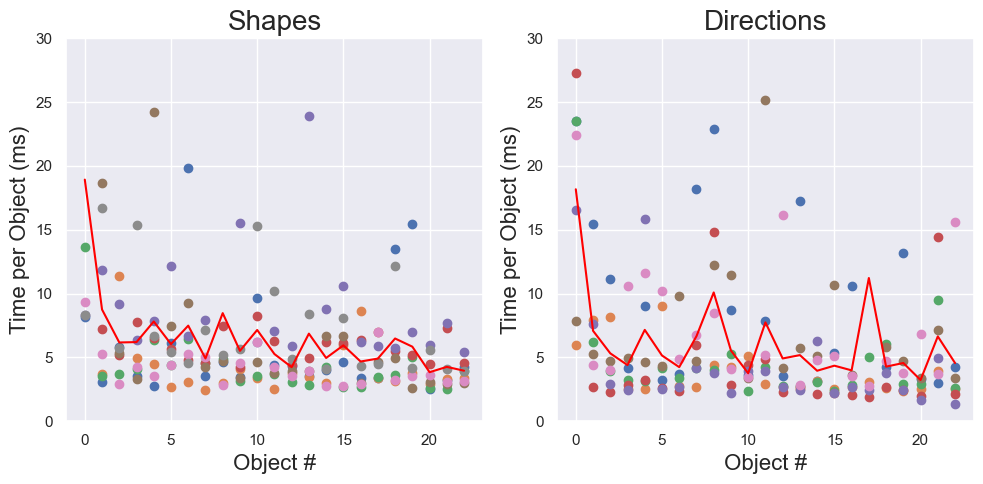

In [142]:
shapes_tpo = shapes_dict["time_per_object"][1:]
shapes_tpo = np.array(shapes_tpo)
shapes_tpo = remove_bad(shapes_tpo)

print(shapes_tpo.shape)

dirs_tpo = dir_dict["time_per_object"][1:]
dirs_tpo = np.array(dirs_tpo)
dirs_tpo = remove_bad(dirs_tpo)


fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

for i, pts in enumerate(shapes_tpo):
    ax[0].scatter(x=list(range(23)), y=pts)

for i, pts in enumerate(dirs_tpo):
    ax[1].scatter(x=list(range(23)), y=pts)

ax[0].set_title("Shapes", fontsize=20)
ax[0].set_xlabel("Object #", fontsize=16)
ax[0].set_ylabel("Time per Object (ms)", fontsize=16)
ax[0].set_ylim(0, 30)

ax[1].set_title("Directions", fontsize=20)
ax[1].set_xlabel("Object #", fontsize=16)
ax[1].set_ylabel("Time per Object (ms)", fontsize=16)
ax[1].set_ylim(0, 30)

ax[0].plot(list(range(23)), np.mean(shapes_tpo,axis=0), color="red", label="Shapes")
ax[1].plot(list(range(23)), np.mean(dirs_tpo,axis=0), color="red", label="Directions")

fig.tight_layout()


In [147]:
shapes_tpo_mean = round(np.mean(shapes_dict["time_per_object"]), 2)
shapes_tpo_mean_clean = round(np.mean(shapes_tpo),2)

dirs_tpo_mean = round(np.mean(dir_dict["time_per_object"]),2)
dirs_tpo_mean_clean = round(np.mean(dirs_tpo),2)

print("Shapes mean time per object:", shapes_tpo_mean)
print("Directions mean time per object:", dirs_tpo_mean_clean)

print("Shapes (outliers removed):", shapes_tpo_mean_clean)
print("Directions (outliers removed):", dirs_tpo_mean_clean)

Shapes mean time per object: 6.4
Directions mean time per object: 6.18
Shapes (outliers removed): 6.46
Directions (outliers removed): 6.18


(8, 23)
(7, 23)


Text(0, 0.5, 'Time per Object (ms)')

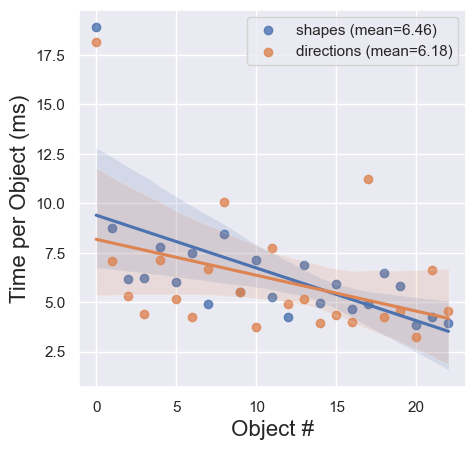

In [149]:
# per-object times

# shapes_per_object_mean_times = np.mean(shapes_dict["time_per_object"], axis=0)[1:]
# dir_per_object_mean_times = np.mean(dir_dict["time_per_object"], axis=0)[1:]

# print(len(shapes_per_object_mean_times) ,shapes_per_object_mean_times)
# print(len(dir_per_object_mean_times), dir_per_object_mean_times)

print(shapes_tpo.shape)
print(dirs_tpo.shape)

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

sns.regplot(x=np.arange(shapes_tpo.shape[1]), y=np.mean(
    shapes_tpo, axis=0), label=f"shapes (mean={shapes_tpo_mean_clean})", ax=ax)

sns.regplot(x=np.arange(dirs_tpo.shape[1]), y=np.mean(
    dirs_tpo, axis=0), label=f"directions (mean={dirs_tpo_mean_clean})", ax=ax)

ax.legend(loc="best")
ax.set_xlabel("Object #", fontsize=16)
ax.set_ylabel("Time per Object (ms)", fontsize=16)


In [165]:
# Left button presses
shapes_left_button_presses = np.mean(shapes_dict["left_button_presses"], axis=0)[0]
shapes_right_button_presses = np.mean(shapes_dict["right_button_presses"], axis=0)[0]

dirs_left_button_presses = np.mean(dir_dict["left_button_presses"], axis=0)[0]
dirs_right_button_presses = np.mean(dir_dict["right_button_presses"], axis=0)[0]

print("Shapes left button presses:", shapes_left_button_presses)
print("Shapes right button presses:", shapes_right_button_presses)

print("Directions left button presses:", dirs_left_button_presses)
print("Directions right button presses:", dirs_right_button_presses)

Shapes left button presses: 30.77777777777778
Shapes right button presses: 31.11111111111111
Directions left button presses: 47.0
Directions right button presses: 46.25


## Other

In [ ]:
def process_array_from_string(array):
    return ast.literal_eval(array)

In [ ]:
def unpack_df(df_in):
    times = []
    buttons_pressed = []
    
    # unpack list of form [1,2,3,...]
    for df in df_in:
        times.append(df.loc[0][2])
        L_hand = process_array_from_string(df.loc[0][3]) #Collect the string and convert over
        R_hand = process_array_from_string(df.loc[0][4]) 
        buttons_pressed.append((L_hand[0],R_hand[0])) 
        
    return times, buttons_pressed

In [ ]:
def add_tuple_button_results(tuple_buttons):
    arr = []
    for tup in tuple_buttons:
        arr.append((tup[0] + tup[1])/2)
    return arr

In [ ]:
def get_tuple_indexed(index, tupl):
    arr = []
    for tup in tupl:
        arr.append(tup[index])
    return arr

In [ ]:
# for shape gestures
times_spent_shapes = []
buttons_presed_shapes = []

# for dir gestures
times_spent_directions = []
buttons_pressed_directions = []

times_spent_shapes, buttons_presed_shapes = unpack_df(shapes_df)
times_spent_directions, buttons_pressed_directions = unpack_df(dir_df)

In [ ]:
print(times_spent_shapes)
print(buttons_presed_shapes)

In [ ]:
# Doing some dataframe magic here.
# Clicks vs techniques for Shape Technique
# times_and_shapes = {"Time to finish in Seconds":times_spent_shapes, "Buttons Pressed": add_tuple_button_results(buttons_presed_shapes)}

times_and_shapes = {"Time to finish in Seconds": times_spent_shapes, "Left Hand Presses": get_tuple_indexed(
    0, buttons_presed_shapes), "Right Hand Presses": get_tuple_indexed(1, buttons_presed_shapes)}
shapes_df_times_button = pd.DataFrame(data=times_and_shapes).sort_values(by=[
    'Time to finish in Seconds'])

g = seaborn.PairGrid(shapes_df_times_button, x_vars="Time to finish in Seconds", y_vars=[
                     "Left Hand Presses", "Right Hand Presses"], height=4, palette=["Left Hand Presses", "Right Hand Presses"])
# g.add_legend(title="Times for Button Presses with Shape Technique" )
g.map_diag(seaborn.histplot, color=".3")
g.map_offdiag(seaborn.scatterplot)


# Junkyard

# seaborn.scatterplot(data=shapes_df_times_button, x="Time to finish in Seconds", y="Buttons Pressed", legend=True)
# seaborn.rugplot(data=shapes_df_times_button, x="Time to finish in Seconds", y="Buttons Pressed", legend=True)
# g = seaborn.PairGrid(shapes_df_times_button,corner = True)
# g.map(seaborn.scatterplot)

# seaborn.jointplot(data=shapes_df_times_button, x="Time to finish in Seconds", y="Buttons Pressed")
# seaborn.kdeplot(data=shapes_df_times_button, x="Time to finish in Seconds")
# seaborn.lmplot('Time to finish', 'Buttons Pressed', data=shapes_df_times_buttons, fit_reg=False)
# seaborn.distplot(shapes_df_times_buttons)
# seaborn.rugplot(shapes_df_times_buttons)
# plt.hist(shapes_df_times_buttons, alpha=.3)
# seaborn.kdeplot(data=shapes_df_times_button, x="Time to finish", hue="Left Hand Presses", multiple="stack")
# seaborn.displot(data=times_and_shapes, x="Time to finish in Seconds", hue="Left Hand Presses", multiple="stack")
# seaborn.displot(data=times_and_shapes, x="Time to finish in Seconds", y="Buttons Pressed")

# seaborn.histplot(data=times_and_shapes, x="Time to finish in Seconds", y="Buttons Pressed", kde=True)
# seaborn.displot(data=times_and_shapes, x="Time to finish in Seconds", kde=True)0
# seaborn.displot(data=times_and_shapes, x="Time to finish in Seconds",kind="ecdf", rug=True, legend=True)

# seaborn.displot(
#     data=times_and_shapes, hue="Left Hand Presses",   col="Time to finish in Seconds",
#     kind="ecdf", height=4, aspect=.7,
# )
# seaborn.displot(data=times_and_shapes, x="Time to finish in Seconds", hue="Left Hand Presses", col="Right Hand Presses", kind="kde")
# seaborn.kdeplot(shapes_df_times_buttons["Time to finish"])
# shapes_df_times_button


In [ ]:
#Doing some dataframe magic here.
#Clicks vs techniques for Direction Technique
# times_and_shapes = {"Time to finish in Seconds":times_spent_shapes, "Buttons Pressed": add_tuple_button_results(buttons_presed_shapes)}
times_and_dirs = {"Time to finish in Seconds":times_spent_directions, "Left Hand Presses":get_tuple_indexed(0,buttons_pressed_directions), "Right Hand Presses": get_tuple_indexed(1,buttons_pressed_directions)}
dirs_df_times_button = pd.DataFrame(data = times_and_dirs).sort_values(by=['Time to finish in Seconds'])

q = seaborn.PairGrid(dirs_df_times_button , x_vars="Time to finish in Seconds", y_vars=["Left Hand Presses","Right Hand Presses"],height=4,palette=["Left Hand Presses","Right Hand Presses"])
# g.add_legend(title="Times for Button Presses with Shape Technique" )
q.map_diag(seaborn.histplot, color=".3")
q.map_offdiag(seaborn.scatterplot)

In [ ]:
#time per pickup vs num objects left in scene vs techniques, 


#clicks vs objects left in scene vs techniques, same for hand distances